In [1]:
import cv2
import matplotlib.pyplot as plt

**Step 1:** Read and Preprocess Image

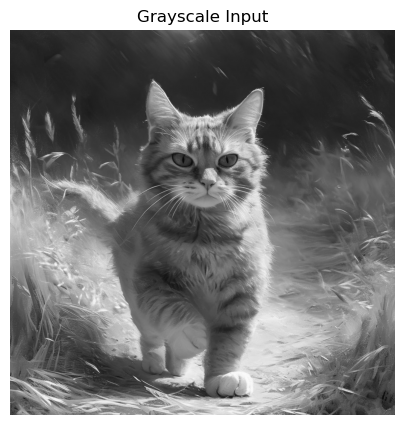

In [2]:
img = cv2.imread('kucing.jpg')
gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

plt.figure(figsize=[6, 5])
plt.imshow(gray, cmap='gray')
plt.title('Grayscale Input')
plt.axis('off')
plt.show()

**Step 2:** Initialize SIFT Detector

In [3]:
sift = cv2.SIFT_create()

# Detect keypoints and compute descriptors
keypoints, descriptors = sift.detectAndCompute(gray, None)
print("Number of keypoints detected:", len(keypoints))
print("Descriptor shape:", descriptors.shape)


Number of keypoints detected: 2677
Descriptor shape: (2677, 128)


**Step 3:** Draw Keypoints

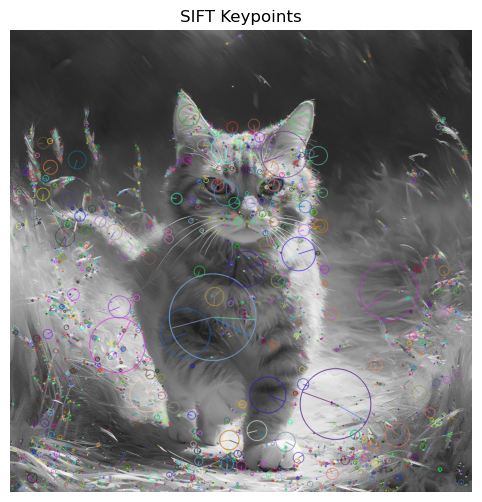

In [4]:
img_keypoints = cv2.drawKeypoints(
    gray, keypoints, None,
    flags=cv2.DRAW_MATCHES_FLAGS_DRAW_RICH_KEYPOINTS
)

plt.figure(figsize=(8,6))
plt.imshow(img_keypoints)
plt.title('SIFT Keypoints')
plt.axis('off')
plt.show()


 **Step 4:** Feature Matching

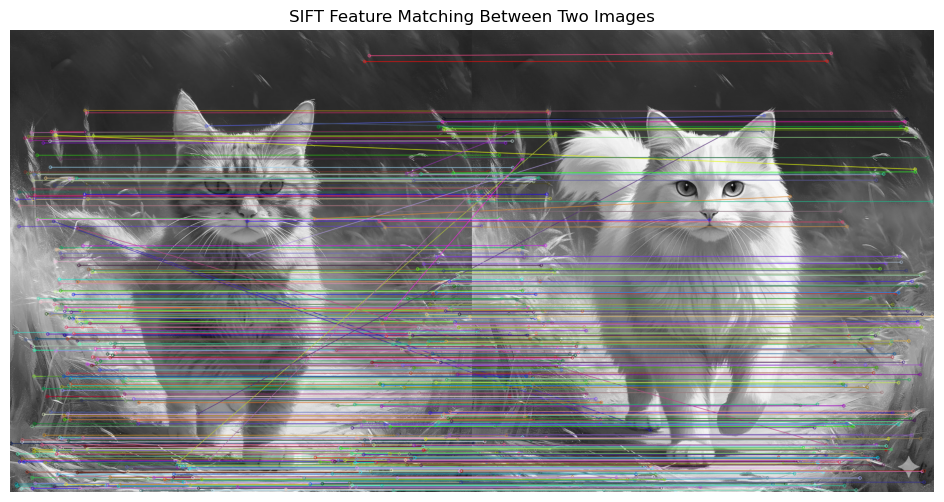

In [5]:
# Load another similar image for comparison
img2 = cv2.imread('kucing_2.png')
gray2 = cv2.cvtColor(img2, cv2.COLOR_BGR2GRAY)

# Detect SIFT features in both images
kp1, des1 = sift.detectAndCompute(gray, None)
kp2, des2 = sift.detectAndCompute(gray2, None)

# Brute-Force Matcher
bf = cv2.BFMatcher()
matches = bf.knnMatch(des1, des2, k=2)

# Apply ratio test to keep good matches
good = []
for m, n in matches:
    if m.distance < 0.75 * n.distance:
        good.append([m])

# Draw good matches
img_match = cv2.drawMatchesKnn(
    gray, kp1, gray2, kp2, good, None, flags=2
)

plt.figure(figsize=(12,6))
plt.imshow(img_match)
plt.title('SIFT Feature Matching Between Two Images')
plt.axis('off')
plt.show()